In [4]:
import pandas as pd

In [5]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/Users/uk250007/Desktop/Data/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

In [6]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/Users/uk250007/Desktop/Data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [7]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/Users/uk250007/Desktop/Data/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [10]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [11]:
ratings_by_title = data.groupby('title').size()

In [12]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [13]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [14]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [15]:
mean_ratings = mean_ratings.loc[active_titles]

In [16]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [17]:
top_female_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [18]:
top_female_ratings

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [19]:
mean_ratings['diff']=mean_ratings['M'] - mean_ratings['F']

In [20]:
sorted_by_diff=mean_ratings.sort_values(by='diff')

In [21]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [22]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [23]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [31]:
top_ten = rating_std_by_title.sort_values(ascending=False)[:10]

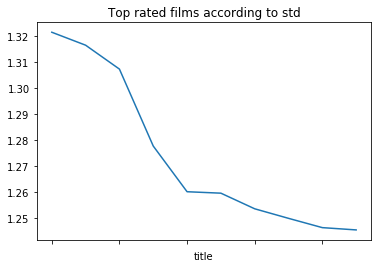

In [30]:
top_ten.plot(title='Top rated films according to std')
